# CONFIG

In [2]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes
## for statistical tests
import scipy
# import statsmodels.formula.api as smf
# import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
# from lime import lime_tabular
import matplotlib.ticker as plticker
import pickle


In [3]:
df = pd.read_csv("train.csv")
df.columns

# df = df.groupby(['Application mode']).size().reset_index(name='counts')
# df



Index(['Id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evalua

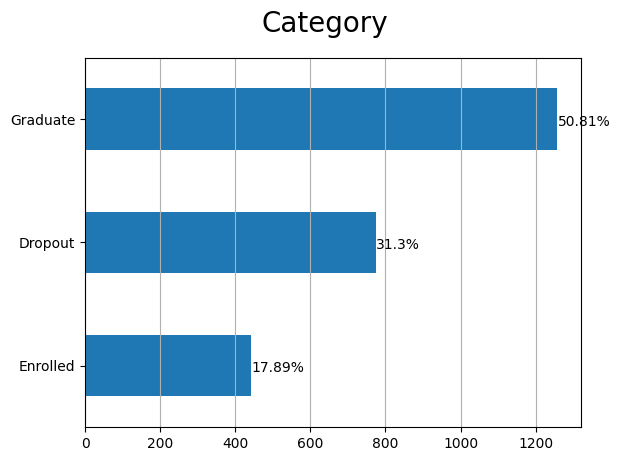

In [4]:
y = "Category"
ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

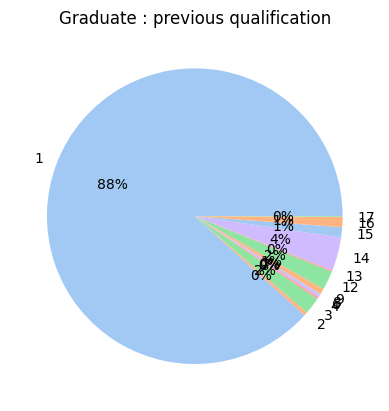

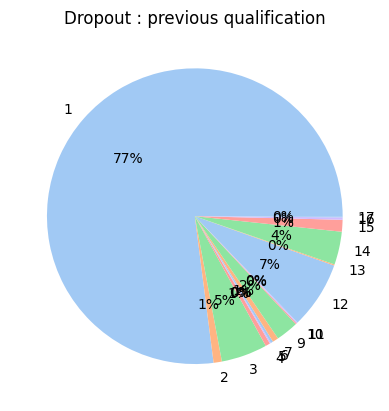

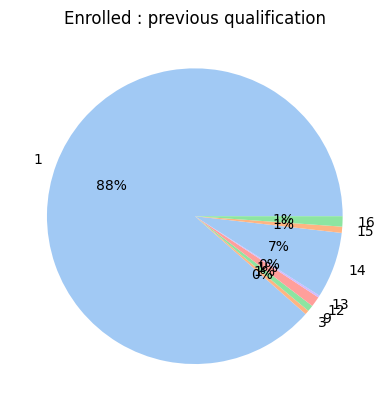

In [5]:
# Prepare Data
df_G = df[(df['Category'] == "Graduate") & (df['Previous qualification'] != 0)]
df_G = df_G.groupby(['Previous qualification']).size().reset_index(name='counts')
#define Seaborn color palette to use
labels = df_G["Previous qualification"]
colors = sns.color_palette('pastel')[0:5]
plt.title("Graduate : previous qualification")
plt.pie(df_G["counts"], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

df_D = df[(df['Category'] == "Dropout") & (df['Previous qualification'] != 0)]
df_D = df_D.groupby(['Previous qualification']).size().reset_index(name='counts')
#define Seaborn color palette to use
labels = df_D["Previous qualification"]
colors = sns.color_palette('pastel')[0:5]
plt.title("Dropout : previous qualification")
plt.pie(df_D["counts"], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

df_E = df[(df['Category'] == "Enrolled") & (df['Previous qualification'] != 0)]
df_E = df_E.groupby(['Previous qualification']).size().reset_index(name='counts')
#define Seaborn color palette to use
labels = df_E["Previous qualification"]
colors = sns.color_palette('pastel')[0:5]
plt.title("Enrolled : previous qualification")
plt.pie(df_E["counts"], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

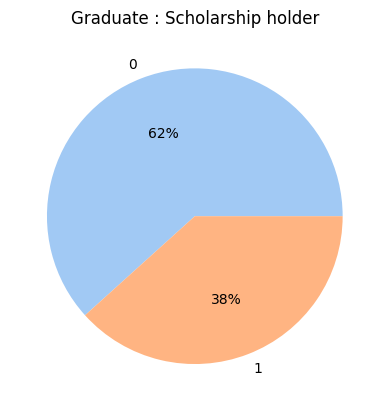

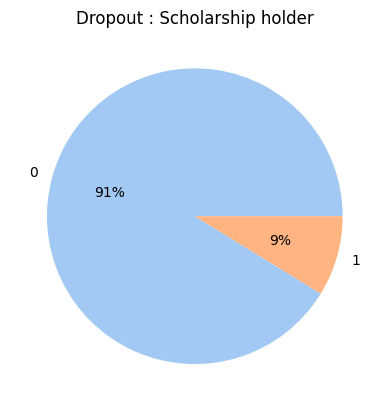

KeyboardInterrupt: 

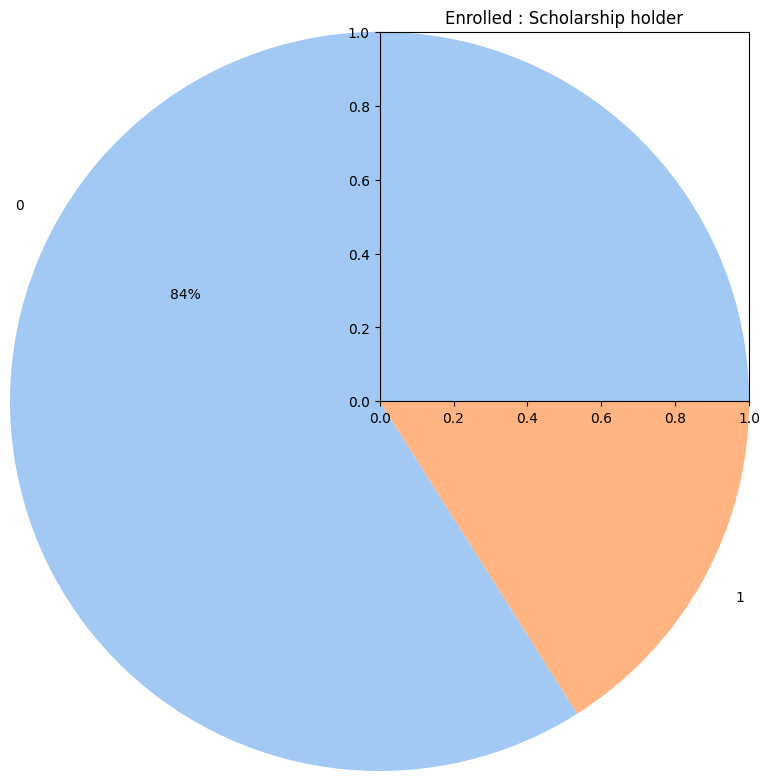

In [6]:
# Prepare Data
df_G = df[(df['Category'] == "Graduate")]
df_G = df_G.groupby(['Scholarship holder']).size().reset_index(name='counts')
#define Seaborn color palette to use
labels = df_G["Scholarship holder"]
colors = sns.color_palette('pastel')[0:5]
plt.title("Graduate : Scholarship holder")
plt.pie(df_G["counts"], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

df_D = df[(df['Category'] == "Dropout")]
df_D = df_D.groupby(['Scholarship holder']).size().reset_index(name='counts')
#define Seaborn color palette to use
labels = df_D["Scholarship holder"]
colors = sns.color_palette('pastel')[0:5]
plt.title("Dropout : Scholarship holder")
plt.pie(df_D["counts"], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

df_E = df[(df['Category'] == "Enrolled")]
df_E = df_E.groupby(['Scholarship holder']).size().reset_index(name='counts')
#define Seaborn color palette to use
labels = df_E["Scholarship holder"]
colors = sns.color_palette('pastel')[0:5]
plt.title("Enrolled : Scholarship holder")
plt.pie(df_E["counts"], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_39545/3416172145.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Category'] == 'Graduate', "Father's occupation"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_39545/3416172145.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the

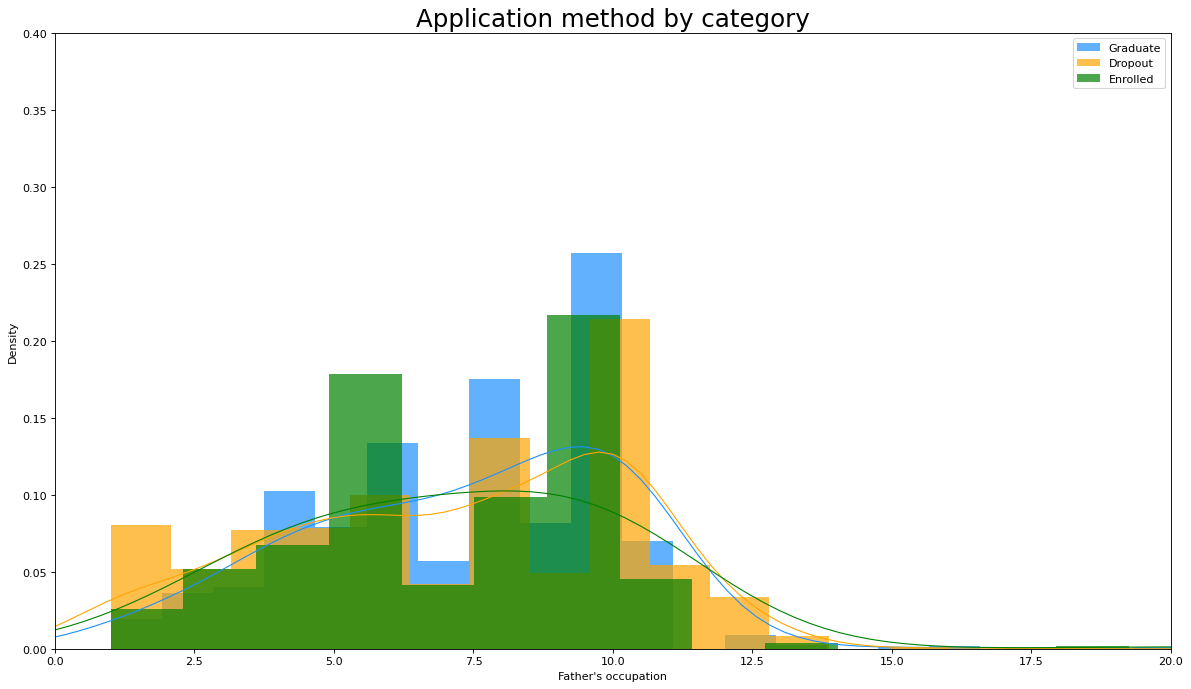

In [10]:
# Draw Plot
plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(df.loc[df['Category'] == 'Graduate', "Father's occupation"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})
sns.distplot(df.loc[df['Category'] == 'Dropout', "Father's occupation"], color="orange", label="Dropout", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})
sns.distplot(df.loc[df['Category'] == 'Enrolled', "Father's occupation"], color="g", label="Enrolled", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})
plt.ylim(0, 0.4)
plt.xlim(0, 20)

# Decoration
plt.title('Application method by category', fontsize=22)
plt.legend()
plt.show()

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_15302/2835758584.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Category'] == 'Graduate', "Age at enrollment"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_15302/2835758584.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the n

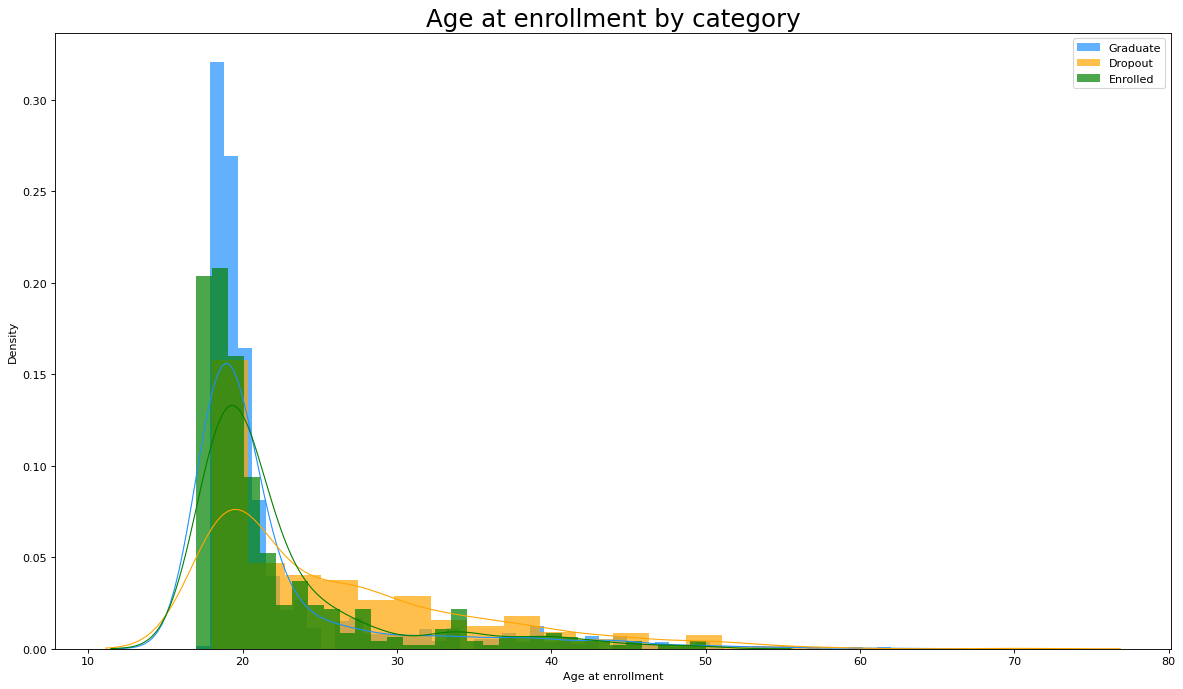

In [123]:
# Draw Plot
plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(df.loc[df['Category'] == 'Graduate', "Age at enrollment"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})
sns.distplot(df.loc[df['Category'] == 'Dropout', "Age at enrollment"], color="orange", label="Dropout", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})
sns.distplot(df.loc[df['Category'] == 'Enrolled', "Age at enrollment"], color="g", label="Enrolled", hist_kws={'alpha':0.7}, kde_kws={'linewidth':1})

# Decoration
plt.title('Age at enrollment by category', fontsize=22)
plt.legend()
plt.show()

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_15302/2495243740.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Category'] == 'Graduate', "Previous qualification"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_15302/2495243740.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use 

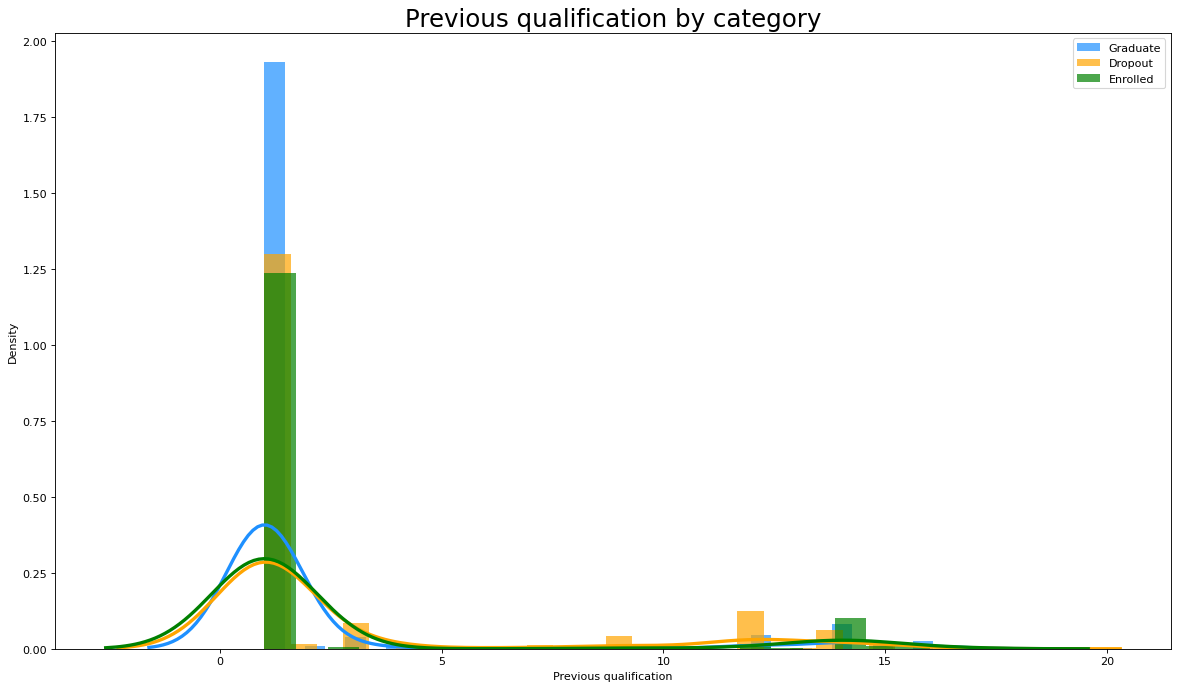

In [124]:
# Draw Plot
plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(df.loc[df['Category'] == 'Graduate', "Previous qualification"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Category'] == 'Dropout', "Previous qualification"], color="orange", label="Dropout", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Category'] == 'Enrolled', "Previous qualification"], color="g", label="Enrolled", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})

# Decoration
plt.title("Previous qualification by category", fontsize=22)
plt.legend()
plt.show()

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_15302/3176984872.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Category'] == 'Graduate', "Father's occupation"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_15302/3176984872.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the

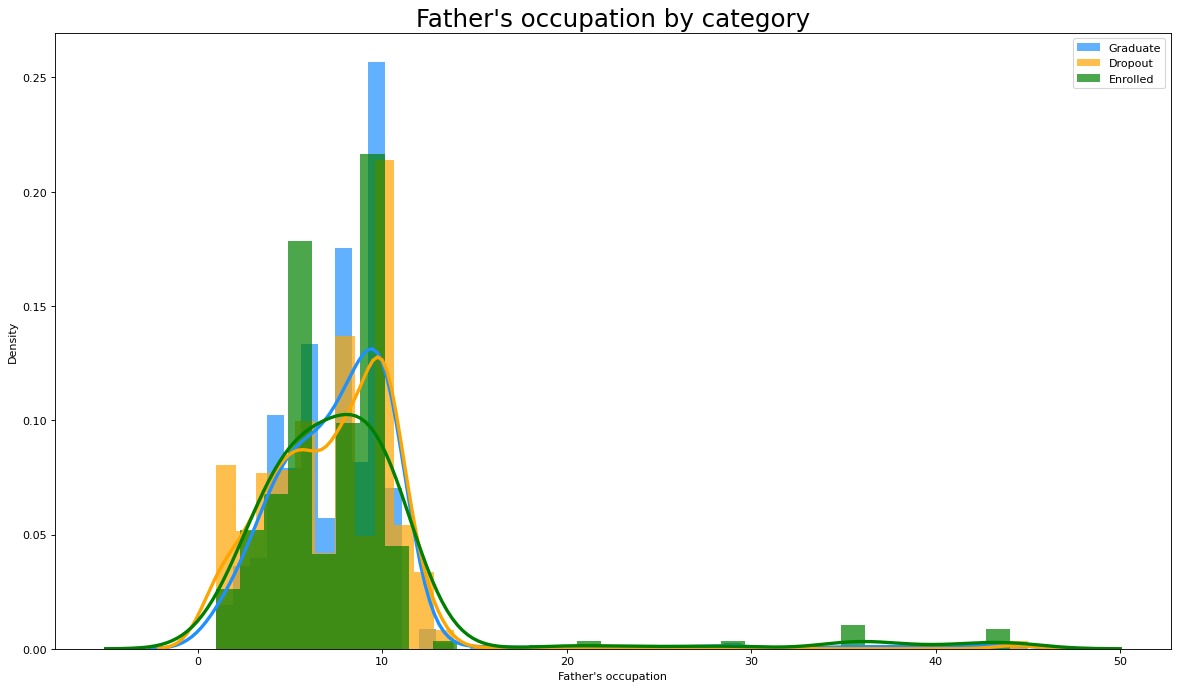

In [125]:
# Draw Plot
plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(df.loc[df['Category'] == 'Graduate', "Father's occupation"], color="dodgerblue", label="Graduate", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Category'] == 'Dropout', "Father's occupation"], color="orange", label="Dropout", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Category'] == 'Enrolled', "Father's occupation"], color="g", label="Enrolled", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})

# Decoration
plt.title("Father's occupation by category", fontsize=22)
plt.legend()
plt.show()

In [126]:
dfs = df[["Previous qualification", "Father's qualification", "Debtor", "Age at enrollment", "Scholarship holder", "Category"]]
dfs

,Previous qualification,Father's qualification,Debtor,Age at enrollment,Scholarship holder,Category
0,1,28,0,20,1,Graduate
1,1,14,0,18,1,Dropout
2,1,1,0,26,0,Graduate
3,12,5,0,24,0,Graduate
4,1,28,0,22,0,Dropout
...,...,...,...,...,...,...
2471,1,14,0,20,0,Graduate
2472,1,14,0,22,1,Graduate
2473,1,3,1,49,0,Dropout
2474,1,28,0,18,1,Graduate


<AxesSubplot: xlabel='selection', ylabel='features'>

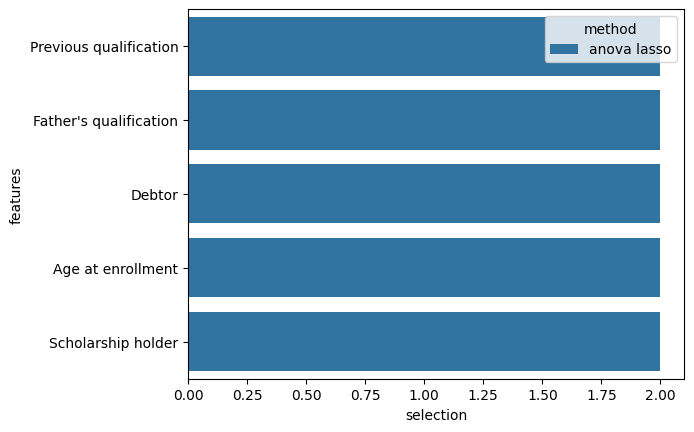

In [127]:
X = dfs.drop("Category", axis=1).values
y = dfs["Category"].values
feature_names = dfs.drop("Category", axis=1).columns

## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=5).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=5).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

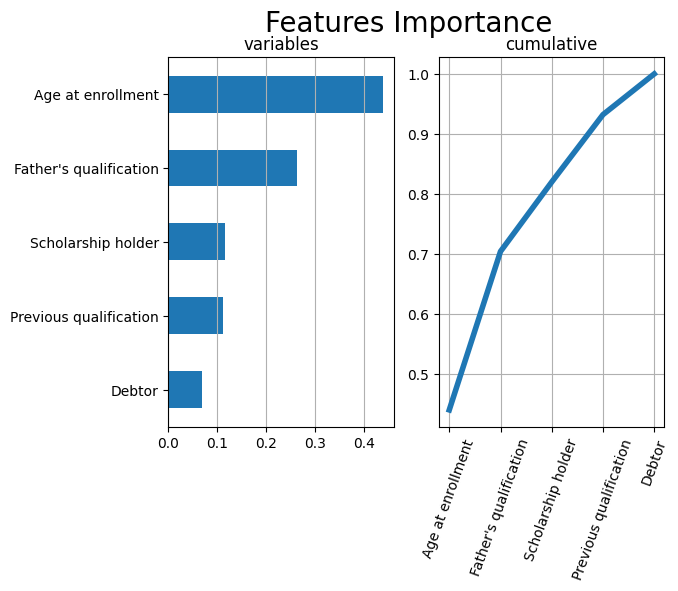

In [128]:
X = dfs.drop("Category", axis=1).values
y = dfs["Category"].values
feature_names = dfs.drop("Category", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dfs
dfs_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dfs_importances['cumsum'] = dfs_importances['IMPORTANCE'].cumsum(axis=0)
dfs_importances = dfs_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dfs_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dfs_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dfs_importances)), xticklabels=dfs_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [129]:
X_names = ["Previous qualification", "Father's qualification", "Debtor", "Age at enrollment", "Scholarship holder"]
X_train = dfs[X_names].values
y_train = dfs["Category"].values

In [134]:
## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.1,0.01],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250],  #number of trees added to the model
'max_depth':[4,5],    #maximum depth of the tree
'min_samples_split':[4,6],    #sets the minimum number of samples to split
'min_samples_leaf':[3,5],     #the minimum number of samples to form a leaf
'subsample':[0.9,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=5, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 4, 'learning_rate': 0.01}
Best Model mean accuracy: 0.5928918214402086


In [136]:
## train
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=5,
                           min_samples_split=6, subsample=0.9)

In [138]:
# save the model to disk
filename = 'finalized_model_academic.sav'
pickle.dump(model, open(filename, 'wb'))